---
# 07. 다층 퍼셉트론으로 손글씨 분류하기

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1979개의 이미지 데이터 로드

In [44]:
# 첫 번째 샘플 출력
print(digits.images[0]) # 8*8 행렬이 출력
print(digits.target[0]) # 라벨은 0

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [45]:
# 전체 샘플의 개수를 확인해보자
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


1 번 인덱스 샘플의 레이블 :  0
2 번 인덱스 샘플의 레이블 :  1
3 번 인덱스 샘플의 레이블 :  2
4 번 인덱스 샘플의 레이블 :  3
5 번 인덱스 샘플의 레이블 :  4


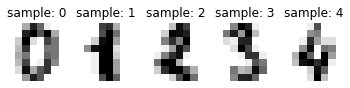

In [46]:
# 상위 5개만 시각화해보자
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    print(index+1,'번 인덱스 샘플의 레이블 : ',label)
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [47]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [48]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [49]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [50]:
# 다층 퍼셉트론 분류기 만들기
import torch
import torch.nn as nn
from torch import optim

In [51]:
torch.manual_seed(1)

In [52]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [53]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [54]:
loss_fn = nn.CrossEntropyLoss()

In [55]:
optimizer = optim.Adam(model.parameters())

In [56]:
losses = []

In [57]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.441051
Epoch   10/100 Cost: 2.105998
Epoch   20/100 Cost: 1.857256
Epoch   30/100 Cost: 1.575444
Epoch   40/100 Cost: 1.275132
Epoch   50/100 Cost: 0.972322
Epoch   60/100 Cost: 0.707070
Epoch   70/100 Cost: 0.519495
Epoch   80/100 Cost: 0.401950
Epoch   90/100 Cost: 0.320815


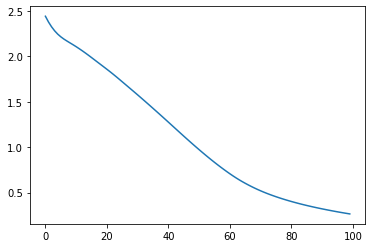

In [58]:
plt.plot(losses)